In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
# Algoriym libraries & modules
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
input_file = pd.read_csv('PreSee-Data.csv')
df = (pd.DataFrame(input_file)).fillna(0)
np_data = np.array(input_file)

In [3]:
df.head()

,patient_id,gender,age,height_cm,weight_kg,bmi,ecg_test_score,ecg_weight,us_test_score,us_weight,...,overall_score,smoking,heart_disease_hist,heart_disease_family_hist,bp_medication,diabetes,work_stress_level,exercise_level,bp_systolic,bp_diastolic
0,1,Male,33,176,79,26,100,30%,100,30%,...,89,NO,NO,NO,NO,NO,2/5,3/5,117,76
1,2,Male,58,189,83,23,100,30%,56,30%,...,59,NO,NO,YES,NO,NO,3/5,4/5,130,81
2,3,Male,35,178,77,24,100,30%,100,30%,...,73,YES,NO,NO,NO,NO,2/5,3/5,129,87
3,4,Male,30,175,90,29,40,30%,100,30%,...,85,YES,NO,NO,NO,NO,1/5,1/5,145,92
4,5,Male,46,180,70,22,100,30%,100,30%,...,78,NO,NO,NO,NO,NO,2/5,5/5,122,79


In [4]:
# WSL = np.array(df.loc[:,'work_stress_level'])
# average_work_stress_level = np.average(WSL)
# print (average_work_stress_level)

## Calibrating the data

In [5]:
# delete irrelevant features
df = df.drop((['ecg_weight','us_weight','patient_id','blood_weight','personal_weight','diabetes', 'personal_score', 'weight_kg', 'height_cm']), axis=1)

# replace yes/no with 0/1 and male/female with 0/1
df = df.replace(to_replace = ['Male','Female'],value = [1,0])
df = df.replace(to_replace = ['YES','NO'],value = [1,0])

# replace x/5 with x, and null/5 to average/5
df['work_stress_level'] = ['3/5' if i =='null/5' else i for i in df['work_stress_level']]
df['work_stress_level'] = [stress_level[0] for stress_level in df['work_stress_level']]
df['exercise_level'] = [stress_level[0] for stress_level in df['exercise_level']]
df['ecg_test_score'] = ['100' if i =='GREEN' else '40' for i in df['ecg_test_score']]

df = df.apply(pd.to_numeric)

In [6]:
# work stress as a label
# df['work_stress_level'] = [0 if stress_level<=3 else 1 for stress_level in df['work_stress_level']]

In [7]:
df.head()
print ()
df.tail()

,gender,age,bmi,ecg_test_score,us_test_score,blood_test_score,overall_score,smoking,heart_disease_hist,heart_disease_family_hist,bp_medication,work_stress_level,exercise_level,bp_systolic,bp_diastolic
1355,1,29,19,100,100,89,1,0,0,0,0,3,2,118,73
1356,1,32,24,100,100,87,1,1,0,1,0,3,1,106,81
1357,0,36,20,100,100,92,1,0,0,1,0,3,1,133,85
1358,1,27,31,100,100,83,1,0,0,0,0,3,2,118,81
1359,1,32,25,100,100,87,1,0,0,0,0,3,2,122,73


## Build a tree

In [8]:
df.head()

,gender,age,bmi,ecg_test_score,us_test_score,blood_test_score,overall_score,smoking,heart_disease_hist,heart_disease_family_hist,bp_medication,work_stress_level,exercise_level,bp_systolic,bp_diastolic
0,1,33,26,40,100,67,89,0,0,0,0,2,3,117,76
1,1,58,23,40,56,76,59,0,0,1,0,3,4,130,81
2,1,35,24,40,100,80,73,1,0,0,0,2,3,129,87
3,1,30,29,40,100,57,85,1,0,0,0,1,1,145,92
4,1,46,22,40,100,89,78,0,0,0,0,2,5,122,79


In [9]:
y = df['heart_disease_family_hist']
X = df.drop('heart_disease_family_hist',axis=1)   #Feature Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,gender,age,bmi,ecg_test_score,us_test_score,blood_test_score,overall_score,smoking,heart_disease_hist,bp_medication,work_stress_level,exercise_level,bp_systolic,bp_diastolic
0,1,33,26,40,100,67,89,0,0,0,2,3,117,76
1,1,58,23,40,56,76,59,0,0,0,3,4,130,81
2,1,35,24,40,100,80,73,1,0,0,2,3,129,87
3,1,30,29,40,100,57,85,1,0,0,1,1,145,92
4,1,46,22,40,100,89,78,0,0,0,2,5,122,79


In [10]:
count=0
# print(y)
for i in y:
    if i==1:
        count+=1
print(count)

156


In [11]:
# Define a function that will create a decision tree that classifies flights (characterized by the predictors) with similar label (target) (Delayed / OnTime) 
def get_clf(X,Y):
    clf = DecisionTreeClassifier(criterion="gini", min_impurity_decrease = 0.0017)
    clf.fit(X, Y)
    return clf

# Call the function
dt_clf = get_clf(X_train,y_train)

In [12]:
# Define a function that takes the trained model and test it on unseen data (i.e., test data)
def get_pred(classifier, X):
    y_pred = classifier.predict(X)
    return y_pred

# Call the function
dt_y_pred = get_pred(dt_clf, X_test)

In [13]:
# Define a function that calculates the accuracy
def get_accuracy(test, pred):
    accuracy = metrics.accuracy_score(test,pred)
    return accuracy

# Call the function
dt_clf_accuracy = get_accuracy(y_test,dt_y_pred)

# Show the Accuracy value
dt_clf_accuracy


0.8639705882352942

In [14]:
%%time

plt.figure(figsize=(250,200))
fig = tree.plot_tree(dt_clf,feature_names=df.columns,class_names=['no_heart_hist', 'heart_hist'],filled=True)

CPU times: user 126 ms, sys: 156 ms, total: 282 ms
Wall time: 323 ms


## Conlclusions:
### Description:

#### After trying different things with our data, trying to achieve the best model to characterise people with family history of heart diseases, we came to the conclulsion that out of all models we tried, a decision tree model will be the most suitable for our purpose and data. It's ability to split the data based on the most separable feature was key to achieving high accuracy rate.
#### We also tried different impurity indexes such as entropy, and different min impurity decreases which defined different trees with different depths.
#### At last, we reached the tree that is accurate enough to give us important insights, without over-fitting our data.

### Tree Discription:

#### As we can see, the root is being divided by the 'bmi' feature, which is composed by both patient's weight and height. This gives us a good split of the data to start with cutting the right brunch from (968,120) to (12,9).
#### Later on, both of our brunches is being divided by the 'blood_test_score' feature, which gives us a good separation as well- one homogeneous child for blood test results of under 68 and one almost homogeneous child for blood test results of under 48.5.

#### So our most important nodes with respect to our research question, are the 2 with the highest significance which comes after dividing by 'bmi' and 'blood_test_score'.

#### This means, we can characterise with relatively high accuracy people with heart disease history by having:
#### 1. Below 39.5 bmi score, and below 48.5 in blood test score.
#### 2. Above 39.5 bmi score, and below 68 in blood test score.

### Our Tree

#### The tree that gave us the best accuracy was the tree with gini index as the loss function and with min impurity decrease of 0.0017. This tree gave us accuracy of 86.3971%, without generating a high tree depth, which can cause us to over-fit the data-set we have.
#### Therefore we decieded to use this tree for our model.

## -------------------------------------------------------------------------------------

## K Means

### women over 40

In [15]:
df.head()

,gender,age,bmi,ecg_test_score,us_test_score,blood_test_score,overall_score,smoking,heart_disease_hist,heart_disease_family_hist,bp_medication,work_stress_level,exercise_level,bp_systolic,bp_diastolic
0,1,33,26,40,100,67,89,0,0,0,0,2,3,117,76
1,1,58,23,40,56,76,59,0,0,1,0,3,4,130,81
2,1,35,24,40,100,80,73,1,0,0,0,2,3,129,87
3,1,30,29,40,100,57,85,1,0,0,0,1,1,145,92
4,1,46,22,40,100,89,78,0,0,0,0,2,5,122,79


In [16]:
female_over_40 = df
# female_over_40 = df.query('')
female_over_40 = female_over_40.drop(['age','gender','bp_medication','heart_disease_hist','blood_test_score'],axis=1)

# female_over_40['age']=(female_over_40['age']-female_over_40['age'].min())/(female_over_40['age'].max()-female_over_40['age'].min())
female_over_40['overall_score']=(female_over_40['overall_score']-female_over_40['overall_score'].min())/(female_over_40['overall_score'].max()-female_over_40['overall_score'].min())
female_over_40['bmi']=(female_over_40['bmi']-female_over_40['bmi'].min())/(female_over_40['bmi'].max()-female_over_40['bmi'].min())
female_over_40['exercise_level']=(female_over_40['exercise_level']-female_over_40['exercise_level'].min())/(female_over_40['exercise_level'].max()-female_over_40['exercise_level'].min())
female_over_40['bp_systolic']=(female_over_40['bp_systolic']-female_over_40['bp_systolic'].min())/(female_over_40['bp_systolic'].max()-female_over_40['bp_systolic'].min())
female_over_40['bp_diastolic']=(female_over_40['bp_diastolic']-female_over_40['bp_diastolic'].min())/(female_over_40['bp_diastolic'].max()-female_over_40['bp_diastolic'].min())
# female_over_40['blood_test_score']=(female_over_40['blood_test_score']-female_over_40['blood_test_score'].min())/(female_over_40['blood_test_score'].max()-female_over_40['blood_test_score'].min())
# female_over_40['us_test_score']=(female_over_40['us_test_score']-female_over_40['us_test_score'].min())/(female_over_40['us_test_score'].max()-female_over_40['us_test_score'].min())
female_over_40['ecg_test_score']=(female_over_40['ecg_test_score']-female_over_40['ecg_test_score'].min())/(female_over_40['ecg_test_score'].max()-female_over_40['ecg_test_score'].min())
female_over_40['work_stress_level']=(female_over_40['work_stress_level']-female_over_40['work_stress_level'].min())/(female_over_40['work_stress_level'].max()-female_over_40['work_stress_level'].min())
# female_over_40

In [17]:
def get_clusterer(points, k):
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(points)
    return clusterer, preds

In [18]:
def find_best_k(points):
    clusters_range = [2,3,4,5,6,7,8,9]
    max_avg = 0
    max_k =2
    silhouette_score_array = []
    for k in clusters_range:
        clusters, preds = get_clusterer(points, k)
        curr_silhouette_score = silhouette_score(points, preds)
        silhouette_score_array.append(curr_silhouette_score)
        if(curr_silhouette_score>max_avg):
            max_k=k
            max_avg=curr_silhouette_score
    print(max_k)
    return max_k 
    

In [19]:
k=find_best_k(female_over_40)
clusterer, preds = get_clusterer(female_over_40,k)

2


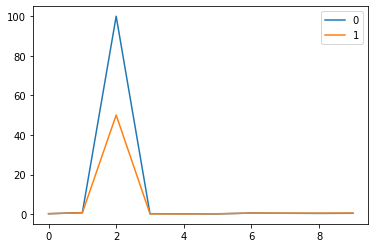

{'bmi': 0,
 'ecg_test_score': 1,
 'us_test_score': 2,
 'overall_score': 3,
 'smoking': 4,
 'heart_disease_family_hist': 5,
 'work_stress_level': 6,
 'exercise_level': 7,
 'bp_systolic': 8,
 'bp_diastolic': 9}

In [20]:
#     printing centers location
def show_results(clusterer):
    centers = clusterer.cluster_centers_
#     for i in range(len(centers)):
#         print(i,':',centers[i,:],'\n')
    for i in range(len(centers)):
        plt.plot(centers[i,:],label = i)
    plt.legend()
    plt.show()
        
    
show_results(clusterer)
a = np.array(female_over_40.columns)
dict = {}
for i,feature in enumerate(a):
    dict.update({feature:i})
dict

## Naive-Bayes Probablistic Model

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred  =  classifier.predict(X_test)

In [24]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [26]:
ac

0.8419117647058824

In [27]:
cm

array([[224,  22],
       [ 21,   5]])

In [28]:
[["true negative", "false negative"],
 ["false positive", "true negative"]]

[['true negative', 'false negative'], ['false positive', 'true negative']]